In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Show Code"></form>''')

# **Capstone Project 1: Data Storytelling**
This notebook dives deeper into data and tries to tell a story by means of visualizations.  
Data was cleaned in the previous data-wrangling exercise. Therefore, there are no outliers or missing values in the current data.

In [2]:
# Import useful libraries
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

from collections import defaultdict

import matplotlib as mpl
import seaborn as sns

# Import all functions
from functions import *

sns.set(style ='white',font_scale=1.25)

%matplotlib inline

In [3]:
with open('../data/01-House-Price/wrangled_data_2.pkl','rb') as file:
    housing_orig, FEATURES, transformers = pickle.load(file)

In [4]:
housing = housing_orig.copy()
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,YrSold,SaleType,SaleCondition,SalePrice,log1p(SalePrice),Lat,Lng,zipcode,median_household_income,median_home_value
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,...,2008,WD,Normal,208500,12.247699,42.022197,-93.651510,50010.0,48189.0,165300.0
2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,...,2007,WD,Normal,181500,12.109016,42.041304,-93.650302,50011.0,48189.0,165300.0
3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,...,2008,WD,Normal,223500,12.317171,42.022197,-93.651510,50010.0,48189.0,165300.0
4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,...,2006,WD,Abnorml,140000,11.849405,42.018614,-93.648898,50014.0,37661.0,212500.0
5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,...,2008,WD,Normal,250000,12.429220,42.047831,-93.646745,50010.0,48189.0,165300.0


# **Bivariate Analysis**

## **Numerical Data**

In [8]:
y = housing.SalePrice
housing_num = housing[FEATURES['num']+FEATURES['aug_num']]

In [9]:
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

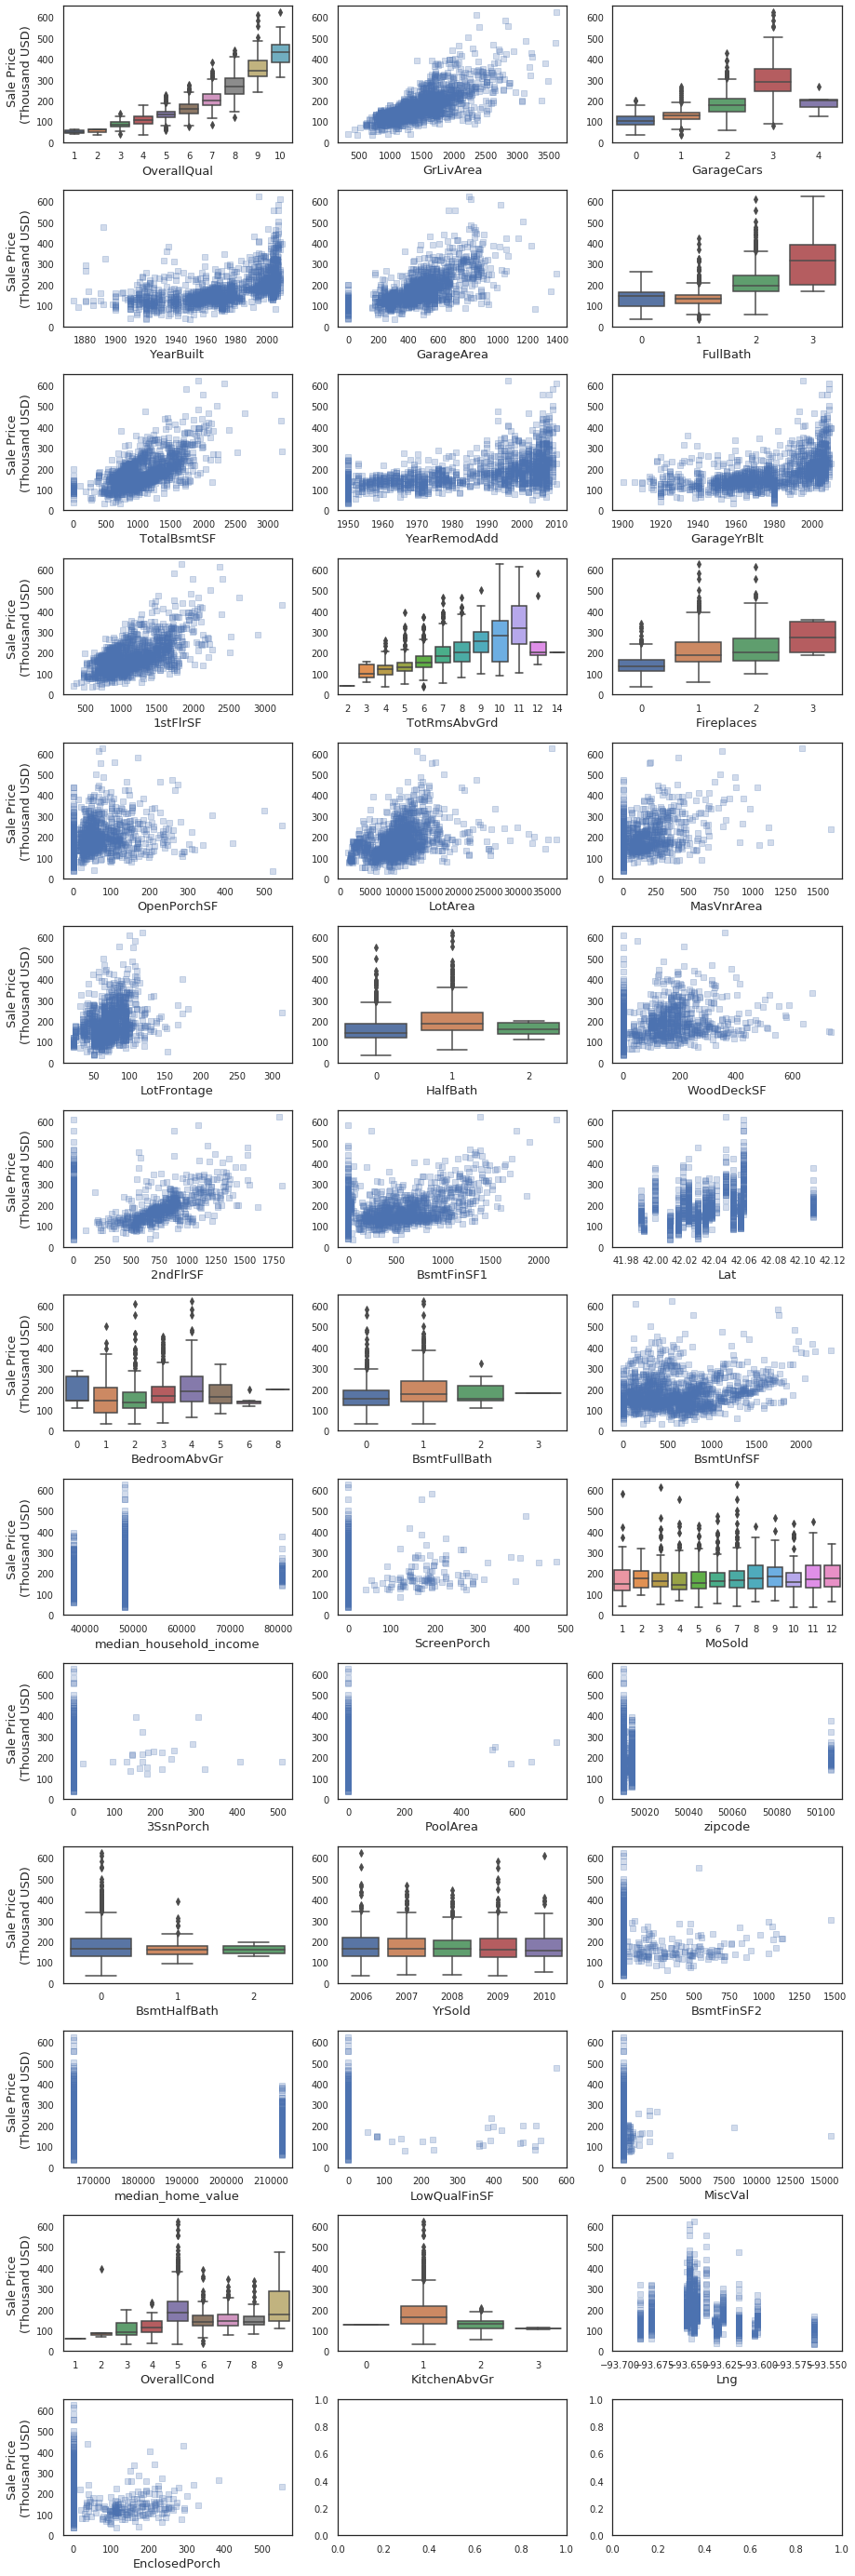

In [10]:
k_cols = 3
fig, axes = plt.subplots(ncols=k_cols,nrows=14,figsize=(15,50))
fig.subplots_adjust(hspace=0.35)
axes = axes.flatten()
yticks = np.arange(0,housing['SalePrice'].max()+1,100000)
yticklabs = [int(num) for num in np.arange(0,housing['SalePrice'].max()+1,100000)/1000]
for ii, feat in enumerate(housing_num.corrwith(y,method='spearman').sort_values(ascending=False).index):
    if feat in 'OverallQual MSSubClass OverallCond BsmtFullBath \
                BsmtHalfBath FullBath HalfBath BedroomAbvGr KitchenAbvGr \
                Fireplaces GarageCars MoSold YrSold TotRmsAbvGrd'.split():
        
        if feat not in FEATURES['discrete']:
            FEATURES['discrete'].append(feat)
        sns.boxplot(x=feat,y='SalePrice',data=housing,ax=axes[ii])
    else:
        if feat not in FEATURES['cont']:
            FEATURES['cont'].append(feat)
        axes[ii].scatter(x=housing[feat],y=y,alpha=0.25,marker='s')
        
    if ii % k_cols != 0:
        axes[ii].set_ylabel('')
    else:
        axes[ii].set_ylabel('Sale Price \n(Thousand USD)',fontsize=13)

    axes[ii].set_yticks(ticks=yticks)
    axes[ii].set_yticklabels(labels=yticklabs)
    axes[ii].set_xlabel(feat,fontsize=13)
    

Comments/Observation:
- Following numercial features showed strong positve correlation (>= 0.4) with the sale price (listed in descending order of their correlation strength with sale price).
    - Overall Quality (**OverallQual**)
    - Above grade living area in sq. ft. (**GrLivArea**)
    - Total garage car capacity in number of cars (**GarageCars**)
    - Year built (**YrBuilt**)
    - Garage area in sq.ft (**GarageArea**)
    - Number of full bathrooms above grade (**FullBath**)
    - Total area of the basement in sq. ft. (**TotalBsmtSF**)
    - Year when the house of remodeled (**YearRemodAdd**) 
    - Garage year built (**GarageYrBlt**)
    - Area of the first floor in sq. ft.(**1stFlrSF**)
    - Total rooms above grade (**TotRmsAbvGrd**)
    - Number of fireplaces (**FirePlaces**)
    - Open porch area in sq. ft. (**OpenPorchSF**)
    - Lot Area in sq. ft. (**LotArea**)
    - Masonry veneer area in sq, ft. (**MasVnrArea**)

### Overall quality vs. Sale Price

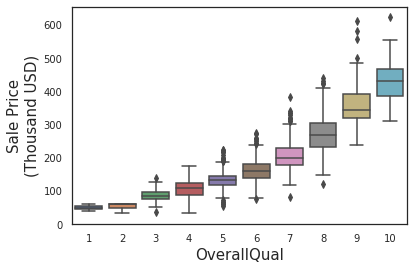

In [11]:
sns.boxplot(x='OverallQual',y='SalePrice',data=housing)
_=plt.yticks(ticks=yticks,labels=yticklabs)
_=plt.ylabel('Sale Price\n(Thousand USD)')

Observation:
- Better quality houses have a higher price

### Housing property size vs. Sale Price

In [12]:
size = dict(zip(['GrLivArea',
        'GarageArea',
        'TotalBsmtSF',
        '1stFlrSF',
        'LotArea',
        'TotRmsAbvGrd',
        'FullBath'],['Above ground living area (sq. ft.)',
 'Garage area (sq. ft.)',
 'Total basement area (sq. ft.)',
 'Area of the first floor (sq. ft.)',
 'Lot Area (sq. ft.)',
 'Total number of rooms above ground',
 'Total number of full bathrooms']))

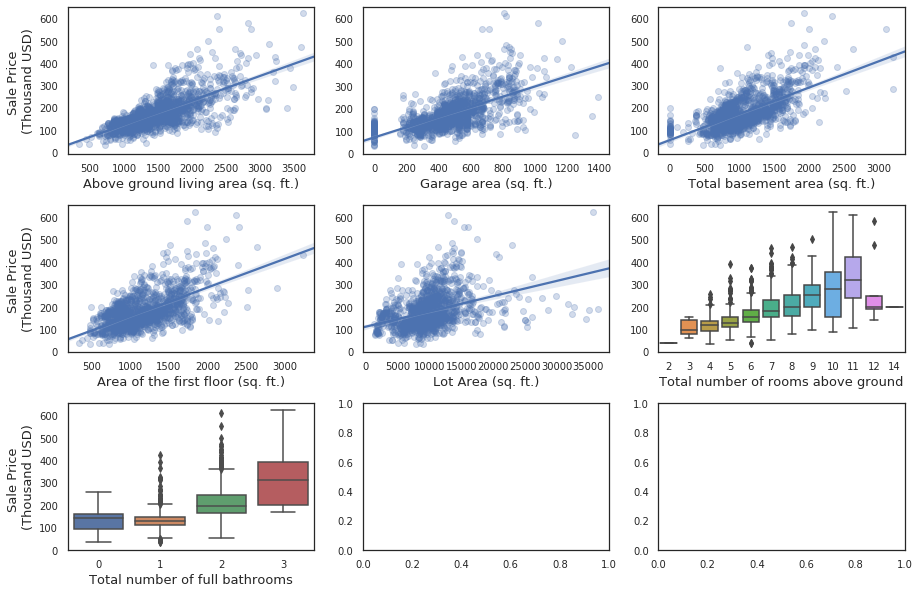

In [13]:
k_cols = 3
fig, axes = plt.subplots(ncols=k_cols,nrows=3,figsize=(15,10))
fig.subplots_adjust(hspace=0.35)
axes = axes.flatten()
for ii, feat in enumerate(['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','LotArea','TotRmsAbvGrd','FullBath']):
    if feat in 'OverallQual MSSubClass OverallCond BsmtFullBath \
                BsmtHalfBath FullBath HalfBath BedroomAbvGr KitchenAbvGr \
                Fireplaces GarageCars MoSold YrSold TotRmsAbvGrd'.split():
        
        if feat not in FEATURES['discrete']:
            FEATURES['discrete'].append(feat)
        sns.boxplot(x=feat,y='SalePrice',data=housing,ax=axes[ii])
    else:
        if feat not in FEATURES['cont']:
            FEATURES['cont'].append(feat)
        sns.regplot(x=housing[feat],y=y,ax=axes[ii],
                    scatter_kws=dict(alpha=0.25),
                    color=sns.color_palette(n_colors=1)[0])
        #axes[ii].scatter(x=housing[feat],y=y,alpha=0.25,marker='s')
        
    if ii % k_cols != 0:
        axes[ii].set_ylabel('')
    else:
        axes[ii].set_ylabel('Sale Price \n(Thousand USD)',fontsize=13)

    axes[ii].set_yticks(ticks=yticks)
    axes[ii].set_yticklabels(labels=yticklabs)
    axes[ii].set_xlabel(size[feat],fontsize=13)
    

Observation:
- Generally, the sale price increases as the size of the housing property increase. Size of the housing property is reflected by variables shown in the plot above.

## **Categorical Data**

Anova on every categorical feature

In [14]:
from scipy import stats

In [17]:
housing_cat = housing[FEATURES['cat']]

The above bar plot shows influence of each categorical feature on the sale price. Features with higher disparity have greater influence on the sale price.

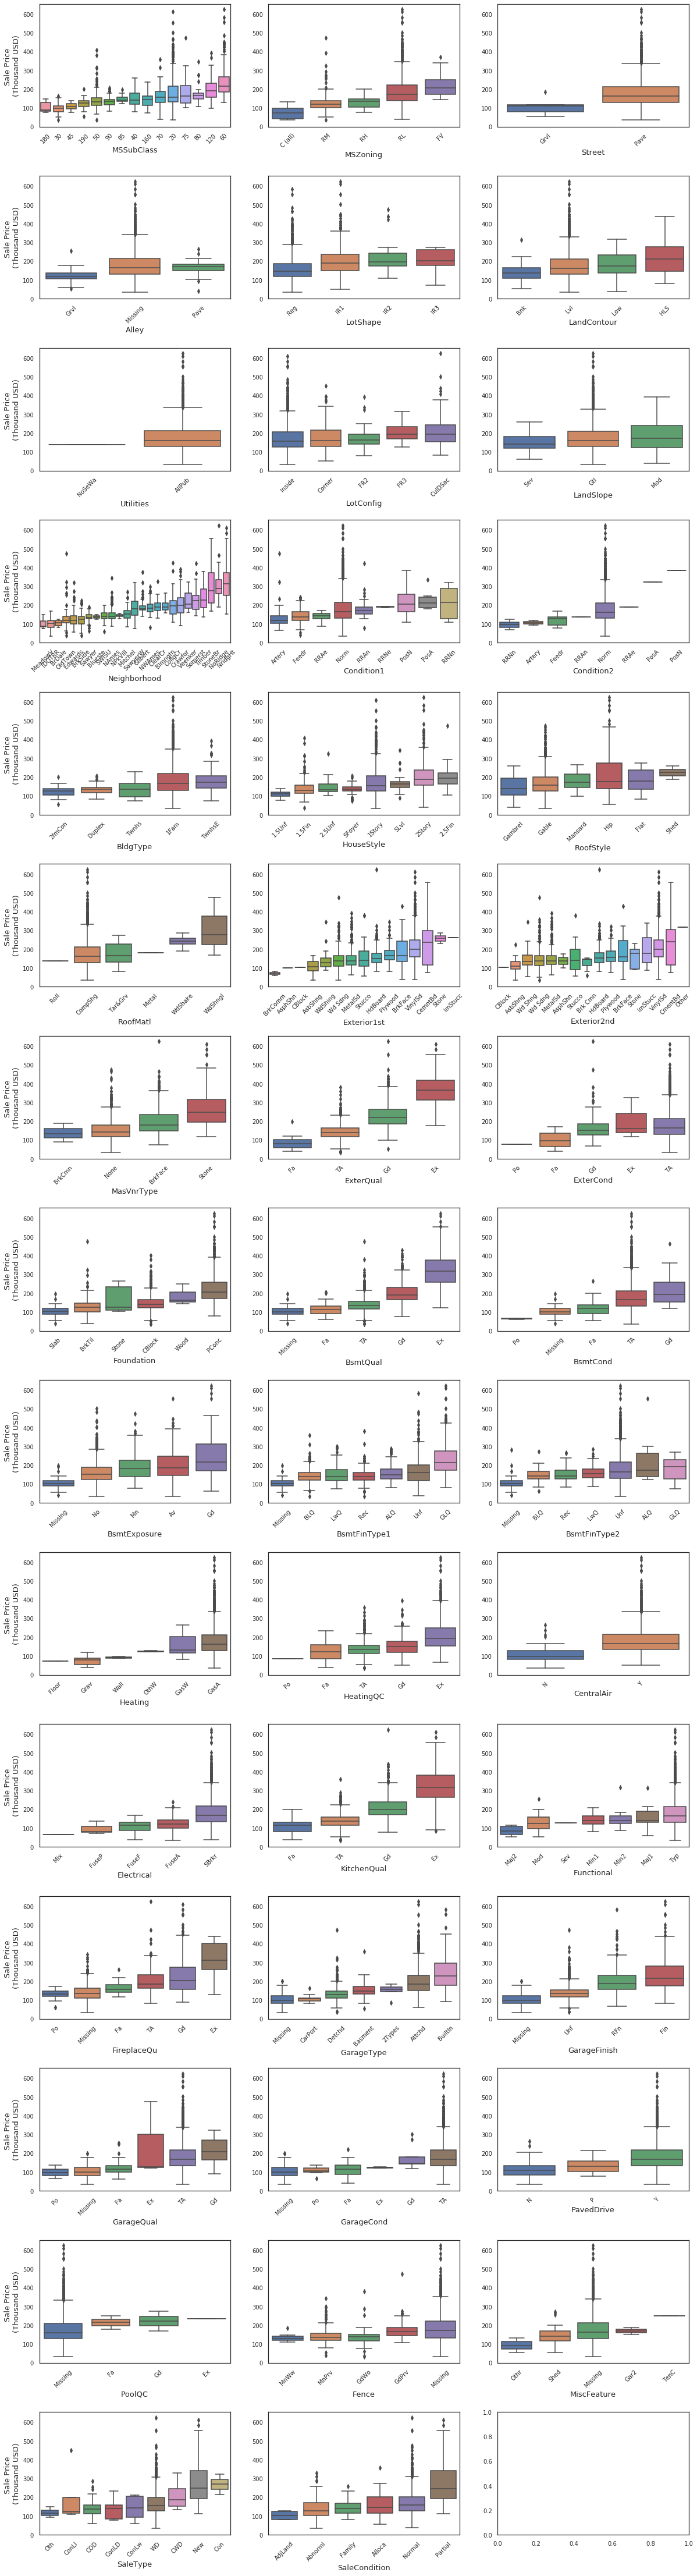

In [18]:
k_cols = 3
fig, axes = plt.subplots(ncols=k_cols,nrows=15,figsize=(20,80))
fig.subplots_adjust(hspace=0.4)
axes = axes.flatten()
yticks = np.arange(0,housing['SalePrice'].max()+1,100000)
yticklabs = [int(num) for num in np.arange(0,housing['SalePrice'].max()+1,100000)/1000]
for ii, feat in enumerate(FEATURES['cat']):
    order = y.groupby(housing_cat[feat]).median().sort_values().index.to_list()
    sns.boxplot(x=feat,y='SalePrice',data=housing_cat.join(y),ax=axes[ii],order=order)
    
    if ii % k_cols != 0:
        axes[ii].set_ylabel('')
    else:
        axes[ii].set_ylabel('Sale Price \n(Thousand USD)',fontsize=13)

    axes[ii].set_yticks(ticks=yticks)
    axes[ii].set_yticklabels(labels=yticklabs)
    axes[ii].set_xlabel(feat,fontsize=13)
    
    for tick in axes[ii].get_xticklabels():
        tick.set_rotation(45)

Following are the top 10 categorical features that influence house price the most (listed in descending order of thier influence):

1. Neighborhood: Neighborhood has highest influence on house price
    - Houses located in **North Ridge** and **North Ridge Heights** have the highest median price
2. Quality of the exterior material (ExterQual)
    - Houses with **excellent** quality of external material tend to have higher price
3. Height of the basement (BsmtQual)
    - Houses with basement **heights > 100 inches** tend to have higher price
4. Kitchen Quality (KitchenQual)
    - **Better quality**, higher price
5. GarageFinish
    - Houses with garage that have **finished interior** have higher price
6. GarageType 
    - Houses with **built-in garage** have higher price
7. Foundation 
    - Houses with foundation made out of **poured concrete**
8. Type of dwelling involved in the sale (MSSubClass)
    - **2-STORY dwelling built in and after 1946** have higher price
9. Fireplace Quality (FireplaceQu)
    - Houses with **excellent** quality fireplace have higher price
10. Heating quality and condition (HeatingQC)
    - Houses with **excellent** quality heating and condition higher price

# **Multivariate Analysis**

In [19]:
def cpal(n_colors):
    colors = [hex for name,hex in mpl.colors.cnames.items()]
    return colors[:n_colors]

/home/climbach/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:202: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn("'color' and 'colormap' cannot be used "


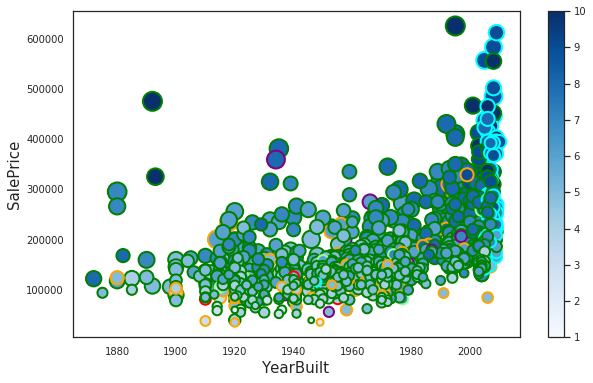

In [20]:
# First create new dataframe that is sorted by GrLivArea in descending order, 
# so that larger data points fall behind the smaller data points in the plot
data = housing.sort_values(by='GrLivArea',ascending=False)

# To define sizes of the data points create an area area array by scaling down
# the GrLivArea (otherwise it will occupy the entire figure)
area = 0.1*data.GrLivArea
# Define color using the overall quality
color = data.OverallQual

# Sale condition as edgecolor
edgecolors = data.SaleCondition.map({'Normal':'green',
                                     'Abnorml':'orange',
                                     'Alloca':'purple',
                                     'Partial':'cyan',
                                     'Family':'palegreen',
                                     'AdjLand':'red'})


ax = data.plot.scatter('YearBuilt','SalePrice',
                       s=area,
                       color=color,
                       colormap=plt.get_cmap('Blues'),
                       linewidths=2,
                       edgecolors=edgecolors,
                       figsize=(10,6),
                       sharex=False) # to keep x axis from being hidden

We are visualizing SalePrice against four variables: YearBuilt (x-axis), OverallQual (colomap), GrLivArea (size of the points), and Sale condition (edgecolors of the points)

Egdecolors distinguishing  Sale Condition:  
    * Normal = green  
    * Abnorml = orange  
    * Alloca = purple  
    * Partial = cyan  
    * Family =  palegreen  
    * AdjLand = red
- Houses with partial SaleCondition (cyan edgecolors) are all built after 2000. 

In [21]:
def ecdf(df,feature,grouping_feature=None):
    if grouping_feature:
        levels = df[grouping_feature].unique()
        for ii, level in enumerate(levels):
            x = df[df[grouping_feature] == level][feature].sort_values()
            #y = y = np.arange(1,len(x)+1)/len(x)
            y = np.arange(1,len(x)+1)/len(x)
            _=plt.plot(x,y,marker='.',linestyle='none',c='C{}'.format(ii),label=level)
            _=plt.legend(loc='center right',bbox_to_anchor=(1.35,0.5))
    else:
        x = df[feature].sort_values()
        #y = y = np.arange(1,len(x)+1)/len(x)
        y = np.arange(1,len(x)+1)/len(x)
        _=plt.plot(x,y,marker='.',linestyle='none',c='C0')
    
    _=plt.ylabel('ECDF')
    _=plt.xlabel(feature)
    plt.margins(0.02)

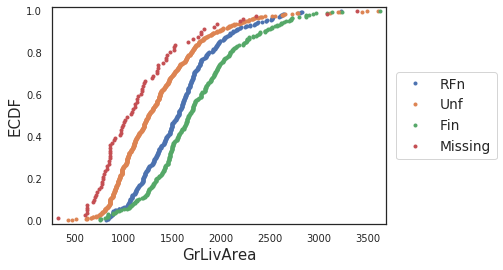

In [22]:
ecdf(housing,'GrLivArea','GarageFinish')

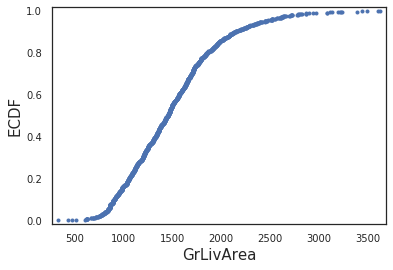

In [23]:
ecdf(housing,'GrLivArea')

### **Is there a relationship between Neighhood and Overall Quality?**
Neighborhood and Overall quality had the highest influence of the sale price. 

In [24]:
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

In [25]:
def cmap(n_cols):
    cmap = sns.color_palette("RdBu", n_colors=n_cols)[::-1]
    return cmap

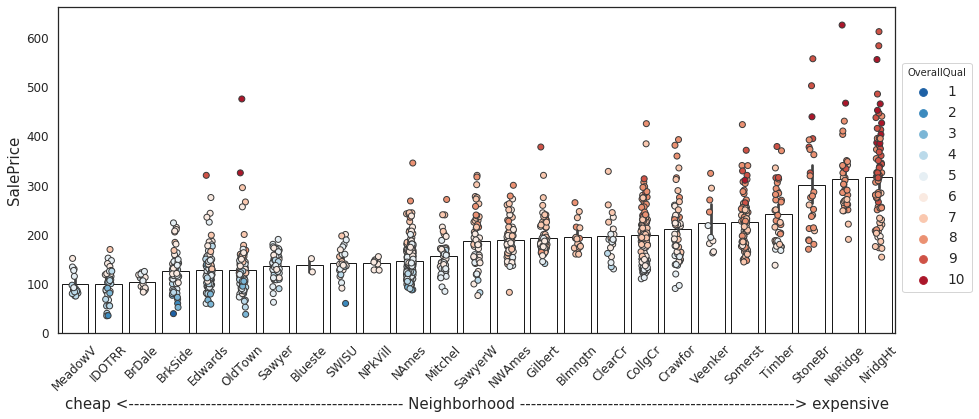

In [26]:
order = housing.groupby('Neighborhood')['SalePrice'].mean().sort_values().index
plt.figure(figsize=(15,6))
sns.barplot(x='Neighborhood',
            y='SalePrice',
            data=housing,
            order=order,
            color='white',
            edgecolor='k')
plt.yticks(ticks=yticks,labels=yticklabs)
sns.stripplot(x='Neighborhood',
              y='SalePrice',
              data=housing,
              order=order,
              alpha=1,
              size=6,
              hue='OverallQual',
              palette=cmap(10),
              linewidth=1)
_=plt.xticks(rotation=45)
_=plt.legend(loc='upper right',bbox_to_anchor=(1.1,.85),title='OverallQual')
_=plt.xlabel("cheap <"+"-"*50+" Neighborhood "+"-"*50+"> expensive")


Observation:
- The barplot shows average house price per neighborhood. Bars are ordered in ascending order of the average house prices.
- We can broadly term neighborhoods to the right as "expensive" and those to left as "cheap."

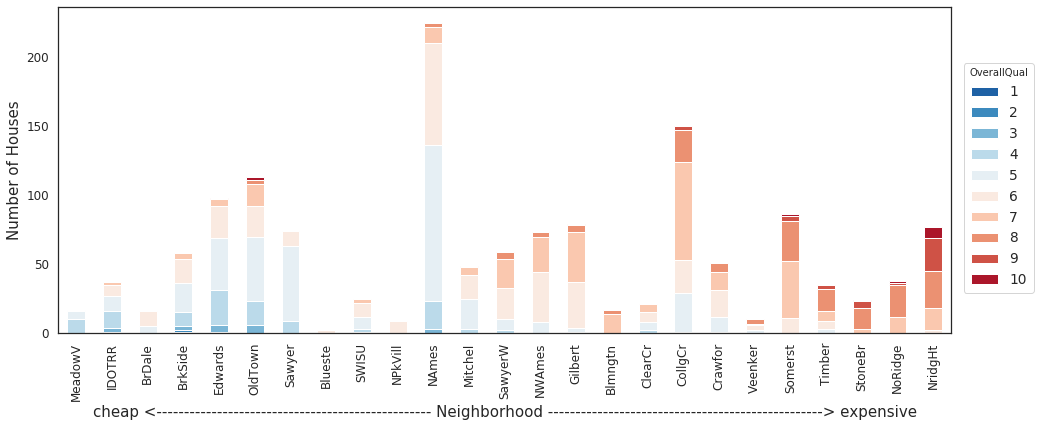

In [27]:
housing.groupby(['Neighborhood','OverallQual']).size().unstack('OverallQual').reindex(index=order).fillna(0).plot.bar(stacked=True,
                                                                                           color=cmap(10),
                                                                                           figsize=(16,6))
_=plt.ylabel('Number of Houses')
_=plt.legend(loc='upper right',bbox_to_anchor=(1.1,.85),title='OverallQual')
_=plt.xlabel("cheap <"+"-"*50+" Neighborhood "+"-"*50+"> expensive")

Observation: 
   - Highest concentration of better overall quality houses is found in **Northridge heights** (one of the expensive neighborhoods).

### **Does garage finish vary by neigborhood?**

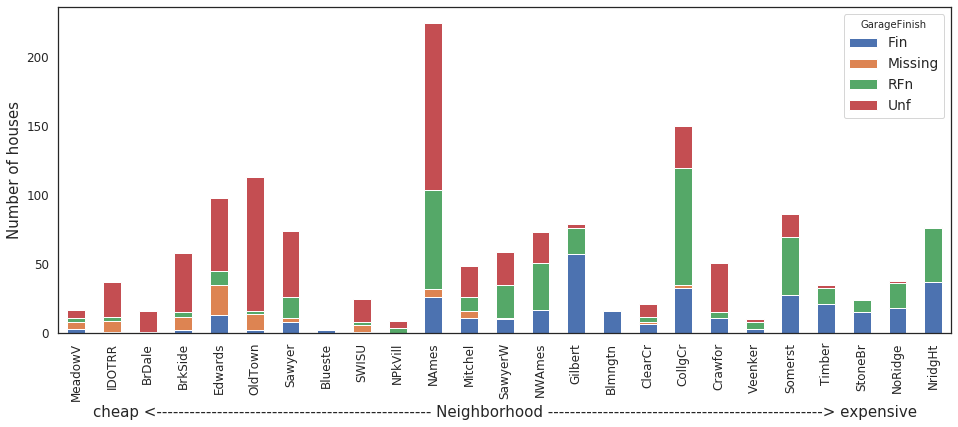

In [28]:
housing.groupby(['Neighborhood','GarageFinish'])['GarageFinish'].size().unstack('GarageFinish').fillna(0).reindex(index=order).fillna(0).plot.bar(stacked=True,
                                                                                                                                                  color=sns.color_palette(n_colors=4),
                                                                                                                                                  figsize=(16,6))
_=plt.ylabel('Number of houses')
_=plt.xlabel("cheap <"+"-"*50+" Neighborhood "+"-"*50+"> expensive")

Observation:
- Almost all houses in expensive neighborhoods like **Northridge** and **Northridge Heights** either have a **finished** or a **roughly finished** garage.  
- Houses with no or **un-finished** garage are very common in neighborhoods like **North Ames**, **Old Town**.

### **What types of garage are most prevalent in different neighborhoods?**

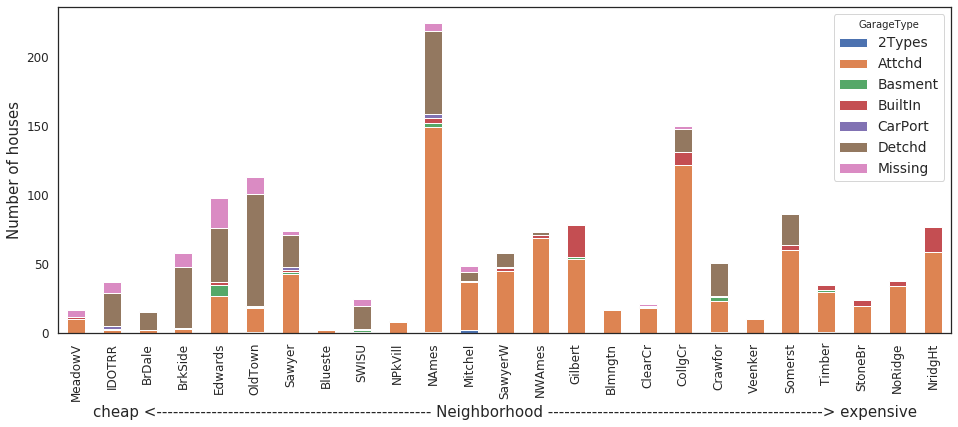

In [29]:
housing.groupby(['Neighborhood','GarageType'])['GarageType'].size().unstack('GarageType').fillna(0).reindex(index=order).fillna(0).plot.bar(stacked=True,
                                                                                                                                                  color=sns.color_palette(n_colors=7),
                                                                                                                                                  figsize=(16,6))
_=plt.ylabel('Number of houses')
_=plt.xlabel("cheap <"+"-"*50+" Neighborhood "+"-"*50+"> expensive")

Obsevation:
- Generally houses with **attached** garage are most prevalent across neighborhoods.
- Besides attached garage, houses with **built-in** garage are most prevalent in moderately expensive (**Gilbert**, **College Creek**) and expensive neighborhoods (**Northridge Heights**, **Northrigde** and **Stone Brook**)
- Houses in cheaper neighborhoods mostly have detached garage, followed by detached garage or no garage at all.

In [30]:
palette = sns.color_palette()

### **In what year highest number of houses were built?**

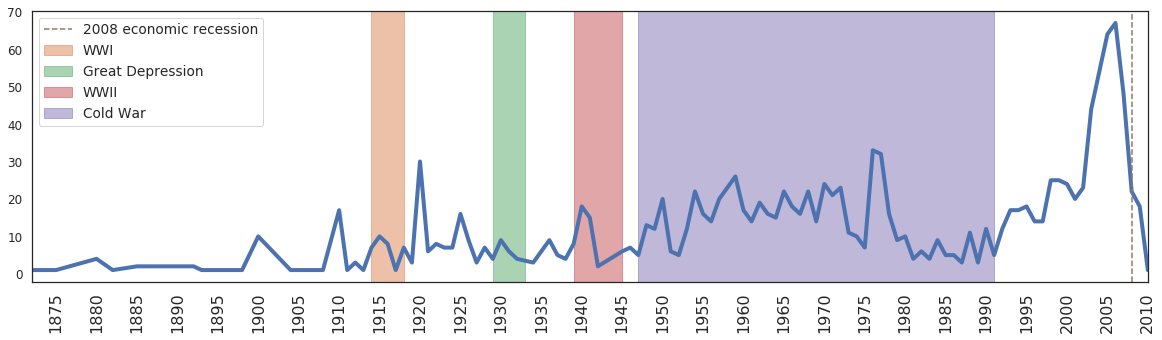

In [31]:
plt.figure(figsize=(20,5))
ax = housing.YearBuilt.value_counts().sort_index().plot(linewidth=4,label = '')
_=plt.axvspan(xmin=1914,xmax=1918,color=palette[1],alpha=0.5,label = 'WWI')
_=plt.axvspan(xmin=1929,xmax=1933,color=palette[2],alpha=0.5,label ='Great Depression')
_=plt.axvspan(xmin=1939,xmax=1945,color=palette[3],alpha=0.5,label ='WWII')
_=plt.axvspan(xmin=1947,xmax=1991,color=palette[4],alpha=0.5,label='Cold War')
_=plt.axvline(x=2008,linestyle='--', label = '2008 economic recession',color=palette[5])
_=plt.xticks(np.arange(1875,2011,5),rotation = 90,fontsize=16)
_=plt.legend()

Comments/Observation:

Certain years have been shaded to highlight important historic events that took place during those times; it's just meant to give a histrical context.

- After 1990 (which is also the time when Cold War ended and United States' economy boomed), we observe an increase in the number of houses being built in Ames, IA.
- However in 2006, the number peaked and started falling steeply. 

### **Generally after how many years is a house remodeled?**

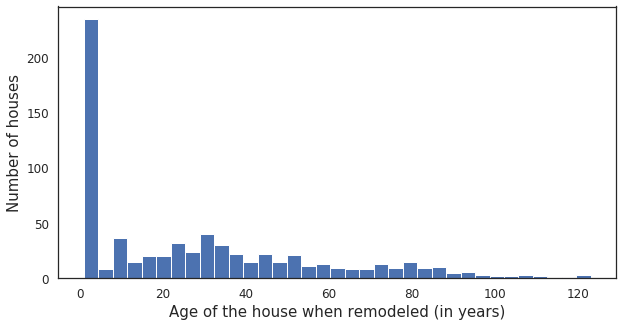

In [32]:
remod_after = housing.YearRemodAdd - housing.YearBuilt
remod_after = remod_after[remod_after > 0]
plt.figure(figsize=(10,5))
_=plt.hist(remod_after,bins=35)
_=plt.xlabel('Age of the house when remodeled (in years)')
_=plt.ylabel('Number of houses')

Comments/Observation:
- Most houses are remodeled within the first couple of years after they are built.

### **In which year most of the houses were sold?**

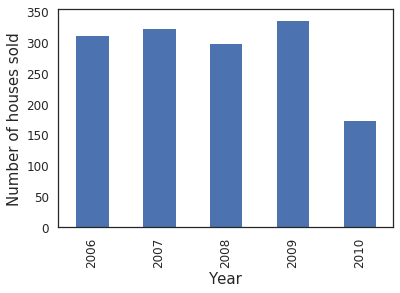

In [33]:
ax = housing.YrSold.value_counts().sort_index().plot.bar()
_=plt.ylabel('Number of houses sold')
_=plt.xlabel('Year')

Comments/Observation:

- All houses were sold between 2006 and 2010 (highest in 2009). 
- Recall this is also the time when number of houses built declined. 

### **Is there a particular time of the year when people choose to buy a house?**

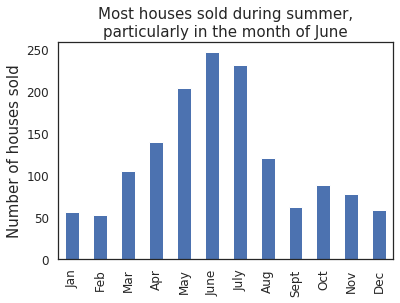

In [34]:
ax = housing.MoSold.value_counts().sort_index().plot.bar(title = 'Most houses sold during summer,\nparticularly in the month of June')
_=plt.xticks(ticks=ax.get_xticks(),labels=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'])
_=plt.ylabel('Number of houses sold')

Comments/Observation:
- Most houses are bougth during the summer, highest being in the month of June.

### **Do house prices fluctuate across the year?**

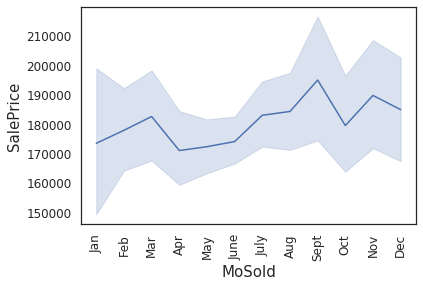

In [35]:
ax = sns.lineplot(x='MoSold',y='SalePrice',data=housing,color=palette[0],)
_=plt.xticks(np.arange(1,13),labels=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'])
_=plt.xticks(rotation=90)

Comments/Observation:
- House prices fall by a few thousand dollars (~$10,000 dollars) by the end of winter (in Apr) and start rising back up by May. This explains why most houses are bought during summer.

### **House zoning in different neighborhoods**

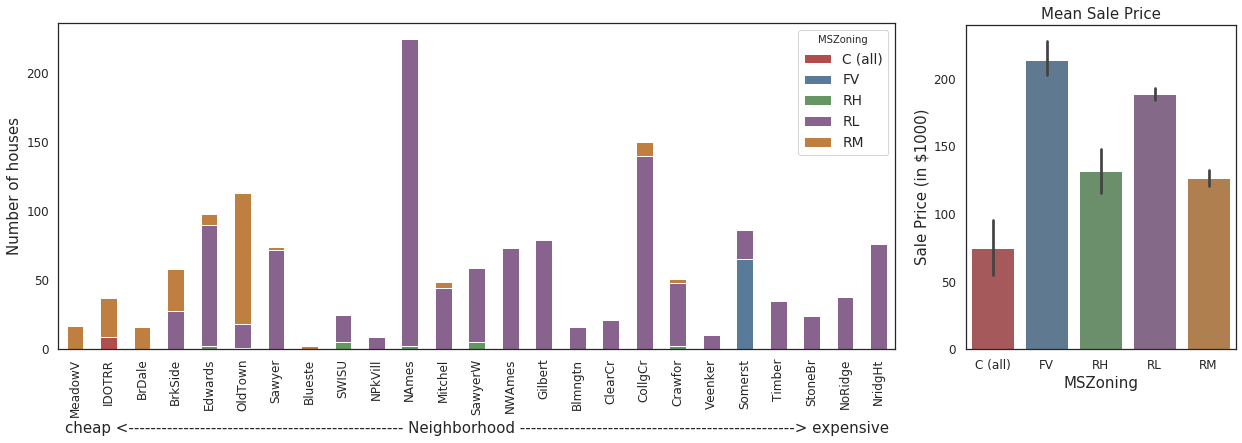

In [36]:
housing.groupby(['Neighborhood','MSZoning']).size().unstack('MSZoning').fillna(0).reindex(index=order).plot.bar(stacked=True,
                                                                                           color=sns.color_palette("Set1", n_colors=5, desat=.5),
                                                                                           figsize=(15,6))
plt.ylabel('Number of houses')
_=plt.xlabel("cheap <"+"-"*50+" Neighborhood "+"-"*50+"> expensive")
plt.axes([.965,0.125,0.25,0.75])
sns.barplot(x='MSZoning',y='SalePrice',
            data=housing,
            palette=sns.color_palette("Set1", n_colors=5, desat=.5),
            order=['C (all)','FV','RH','RL','RM'])
_=plt.yticks(ticks=np.arange(0,250000,50000),
           labels=[int(num) for num in np.arange(0,250000,50000)/1000])
_=plt.ylabel('Sale Price (in $1000)')
_=plt.title('Mean Sale Price')

Conclusion:
- Most houses are located in a **low density residential (RL)** zone across majority neighbohoods.
- In **Somerst**, most houses are located in the **floating village (FV)** residential zone. Note: houses in this zone also have the highest average price.
- Only in **Iowa DOT and Rail Road (IDOTRR)** neighborhood do we find houses located in **commerial (C all)** zones. Note: houses in this zone have the lowest average price.
- Houses located in **floating village residential (FV)** zone are most expensive, whereas those locate in the **commercial** zones are cheapest.

### **Is the size of the housing property influenced by zoning?**

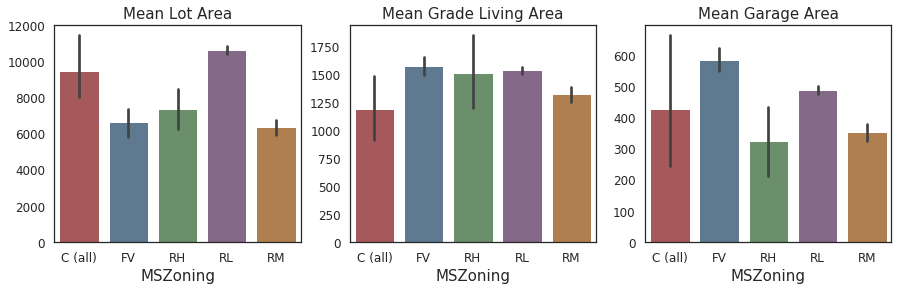

In [37]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(hspace=0.40)

plt.subplot(1,3,1)
sns.barplot(x='MSZoning',y='LotArea',
            data=housing,
            palette=sns.color_palette("Set1", n_colors=5, desat=.5),
            order=['C (all)','FV','RH','RL','RM'])
_=plt.ylabel('')
_=plt.title('Mean Lot Area')

plt.subplot(1,3,2)
sns.barplot(x='MSZoning',y='GrLivArea',
            data=housing,
            palette=sns.color_palette("Set1", n_colors=5, desat=.5),
            order=['C (all)','FV','RH','RL','RM'])
_=plt.ylabel('')
_=plt.title('Mean Grade Living Area')

plt.subplot(1,3,3)
sns.barplot(x='MSZoning',y='GarageArea',
            data=housing,
            palette=sns.color_palette("Set1", n_colors=5, desat=.5),
            order=['C (all)','FV','RH','RL','RM'])
_=plt.ylabel('')
_=plt.title('Mean Garage Area')

Conclusion:
- Houses in **low density residential (RL)** zones have the largest average **Lot Area**. 
- Houses in **floating village residential (FV)** zone have the largest average **Garage Area**.

### **What is the most commom building-type and housing-style for houses in Ames?**

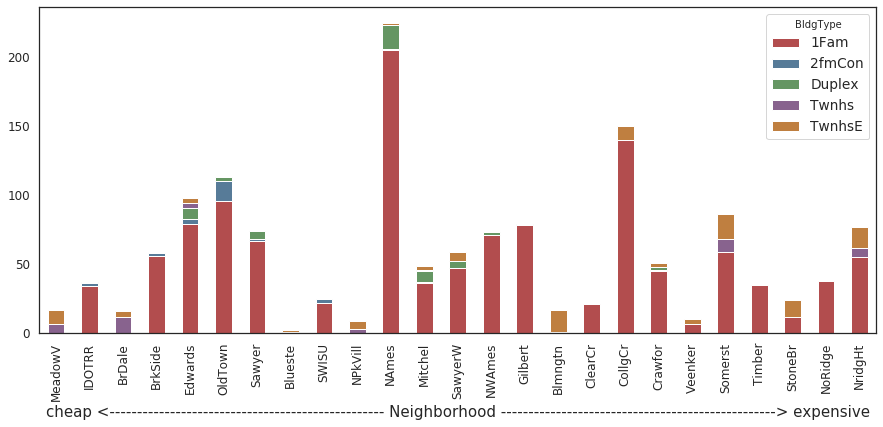

In [38]:
housing.groupby(['BldgType','Neighborhood']).size().unstack('BldgType').fillna(0).reindex(index=order).plot.bar(stacked=True,
                                                                                           color=sns.color_palette("Set1", n_colors=5, desat=.5),
                                                                                           figsize=(15,6))
_=plt.xlabel("cheap <"+"-"*50+" Neighborhood "+"-"*50+"> expensive")

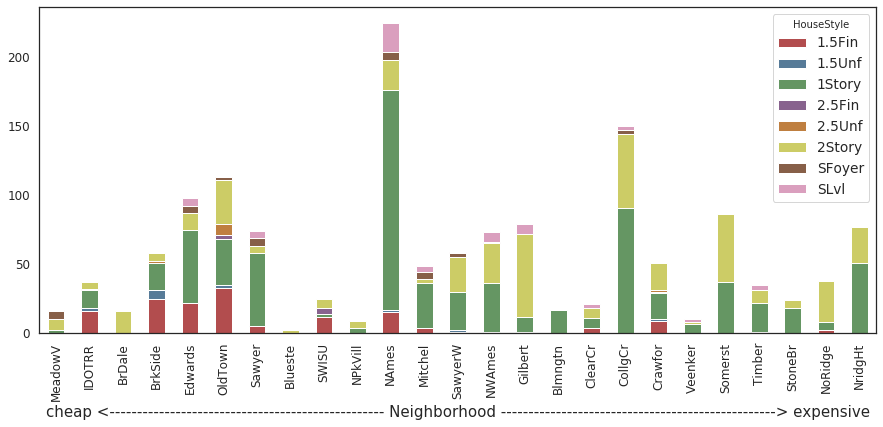

In [39]:
housing.groupby(['HouseStyle','Neighborhood']).size().unstack('HouseStyle').fillna(0).reindex(index=order).plot.bar(stacked=True,
                                                                                           color=sns.color_palette("Set1", n_colors=8, desat=.5),
                                                                                           figsize=(15,6))
_=plt.xlabel("cheap <"+"-"*50+" Neighborhood "+"-"*50+"> expensive")

Conclusion:

- Single family detached (**1Fam**) buiding type and 1 Story houses (**1Story**) house style are most common.